<div style="padding: 10px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden)"><b><span style='color:Yellow;font-size:60px; font-family:Times New Roman;'> GOLD PREDICTION </span></b> </div>

Data overview

- Date - date (MM/dd/yyyy format)
- SPX - stands for The Standard and Poor's 500 index, or simply the S&P 500. It is a stock market index used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA
- GLD - gold price
- USO - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
- SLV - silver price
- EUR/USD - Euro to US dollar exchange ratio

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Importing Libraries</h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

import pickle

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Getting Data</h1>

In [ ]:
# importing the dataset
df = pd.read_csv('../../data/gld_price_data.csv')

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Data Understanding</h1>

In [ ]:
# printing the first 5 data rows
df.head()

In [ ]:
# checking the shape of the dataset
df.info()

```
- Our data has 2290 rows and 6 columns
```

In [ ]:
df.isnull().sum()

`There are no null values in our dataset`

In [ ]:
# Deleting the Date column 
df = df.drop(columns =['Date'],axis=1)
df.head()

`There are outliers in the rows SLV, USO, GLD`

In [ ]:
df.nunique()

In [ ]:
df.head()

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Exploratory Data Analysis</h1>

In [ ]:
df.describe()

#### Distribution of variables

In [ ]:
df.hist(figsize=(24,4) , layout=(1,5) , color='b')

In [ ]:
sns.pairplot(df)

```
From the above distribution plots we can see that the data is not normally distributed, meaning that there are some outliers in the data.
```

In [ ]:
# Treating Outliers
df.boxplot()

In [ ]:
df['GLD'] = np.log(df['GLD'])
df['USO'] = np.log(df['USO'])
df['SLV'] = np.log(df['SLV'])

In [ ]:
df.boxplot()

In [ ]:
# correlation 
correlation = df.corr()

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True, fmt='.1f', cmap='Blues', annot=True, annot_kws={'size':8}, square=True)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Train Test Splitting</h1>

In [ ]:
X = df.drop(columns=['GLD'],axis=1)
y = df['GLD']

In [ ]:
X.head()

In [ ]:
y.head(3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Feature Scaling</h1>

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled  =scaler.transform(X_test)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Model Training</h1>

In [ ]:
# Random forest
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

In [ ]:
# Decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)
y_dt = dt.predict(X_test_scaled)

In [ ]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train_scaled,y_train)
y_xgb = xgb.predict(X_test_scaled)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Regression score using R2score and MAE</h1>

In [ ]:
rf_score = metrics.r2_score(y_test,y_rf)
print("Random forest : ", rf_score)

In [ ]:
dt_score = metrics.r2_score(y_test,y_dt)
print("Decision tree : ",dt_score)

In [ ]:
xgb_score = metrics.r2_score(y_test,y_xgb)
print("XGBoost : ",xgb_score)

In [ ]:
# checking the mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE for Random Forest")
mean_absolute_error(y_test,y_rf)

In [ ]:
print("MAE for Decision Tree")
mean_absolute_error(y_test,y_xgb)

In [ ]:
print("MAE for XGBoost")
mean_absolute_error(y_test,y_rf)

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Hyperparameter Tuning using GridSearchCV</h1>

In [ ]:
rf1 = RandomForestRegressor()
#Number of trees in random forest
n_estimators = [20,60,100,120]

#No. of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,8,None]

#No. of samples
max_samples = [0.5,0.75,1.0]

In [ ]:
param_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'max_samples' : max_samples
}

In [ ]:
rf1_grid = GridSearchCV(estimator = rf1,
                       param_grid = param_grid,
                       cv=5,
                       verbose =2,
                       n_jobs = -1)

In [ ]:
rf1_grid.fit(X_train_scaled,y_train)

In [ ]:
rf1_grid.best_params_

In [ ]:
rf1_grid.best_score_

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Compare the Actual values and Predicted Values in a plot</h1>

In [ ]:
y_test = list(y_test) 

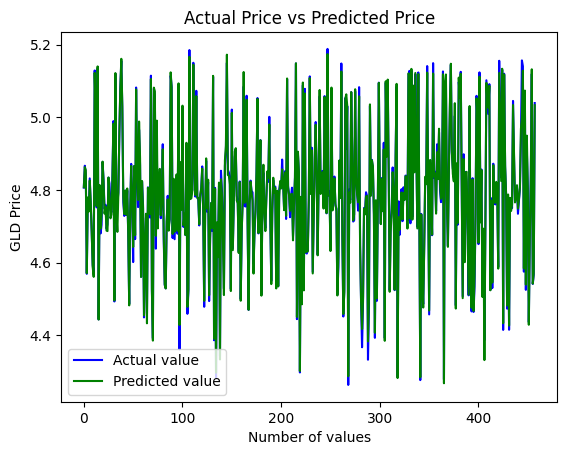

In [109]:
plt.plot(y_test , color='blue' , label='Actual value')
plt.plot(y_rf , color='green' , label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Saving the model</h1>

In [115]:
output_file = '../../model/model.pkl'

In [116]:
# Using with statement
with open(output_file, 'wb') as f_out:
    pickle.dump((scaler, rf1_grid), f_out)